# Analyse et préparation des données pour le perceptron

## Importation des librairies

In [ ]:
# data exploration
import pandas as pd 
import numpy as np

# data visualisation
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.gridspec as gridspec # data visualisation
import seaborn as sns #data visualisation
import scipy.stats as stats # data visualisation

import os # data visualisation (file path)


from imblearn.under_sampling import RandomUnderSampler # Handling Imbalance

from sklearn.linear_model import LogisticRegression  # For the features selection
from sklearn.feature_selection import SequentialFeatureSelector # For the features selection
from sklearn.model_selection import cross_val_score # For the features selection
from sklearn.metrics import r2_score # For the features selection
from sklearn.model_selection import train_test_split # For the features selection

from sklearn.preprocessing import StandardScaler # For scaling the data



## Chargement des données

In [2]:
df = pd.read_csv('bcw_data.csv')
print(f'Les données font {df.shape[0]} lignes et {df.shape[1]} colonnes')
df.head()

Les données font 569 lignes et 33 colonnes


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
print(f'La liste des variables: {df.columns}')

La liste des variables: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
# Enlevé les variables qui ne sont pas utiles
df = df.drop('id', axis = 1)
df = df.drop('Unnamed: 32', axis = 1)

## Exploration des données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.describe

<bound method NDFrame.describe of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.2

### Vérification des valeurs manquantes

In [7]:
print(f'Il y a {df.isnull().sum().sum()} valeurs manquantes dans le dataset')

Il y a 0 valeurs manquantes dans le dataset


### Verification des doublons

In [8]:
print(f' Il y a {df.duplicated().sum()} de valeurs en doublon')

 Il y a 0 de valeurs en doublon


Le dataset ne nécessite pas de préparation pour l'exploration

## Analyse des données

Text(0.5, 1.0, 'Correlation Map between all the variables')

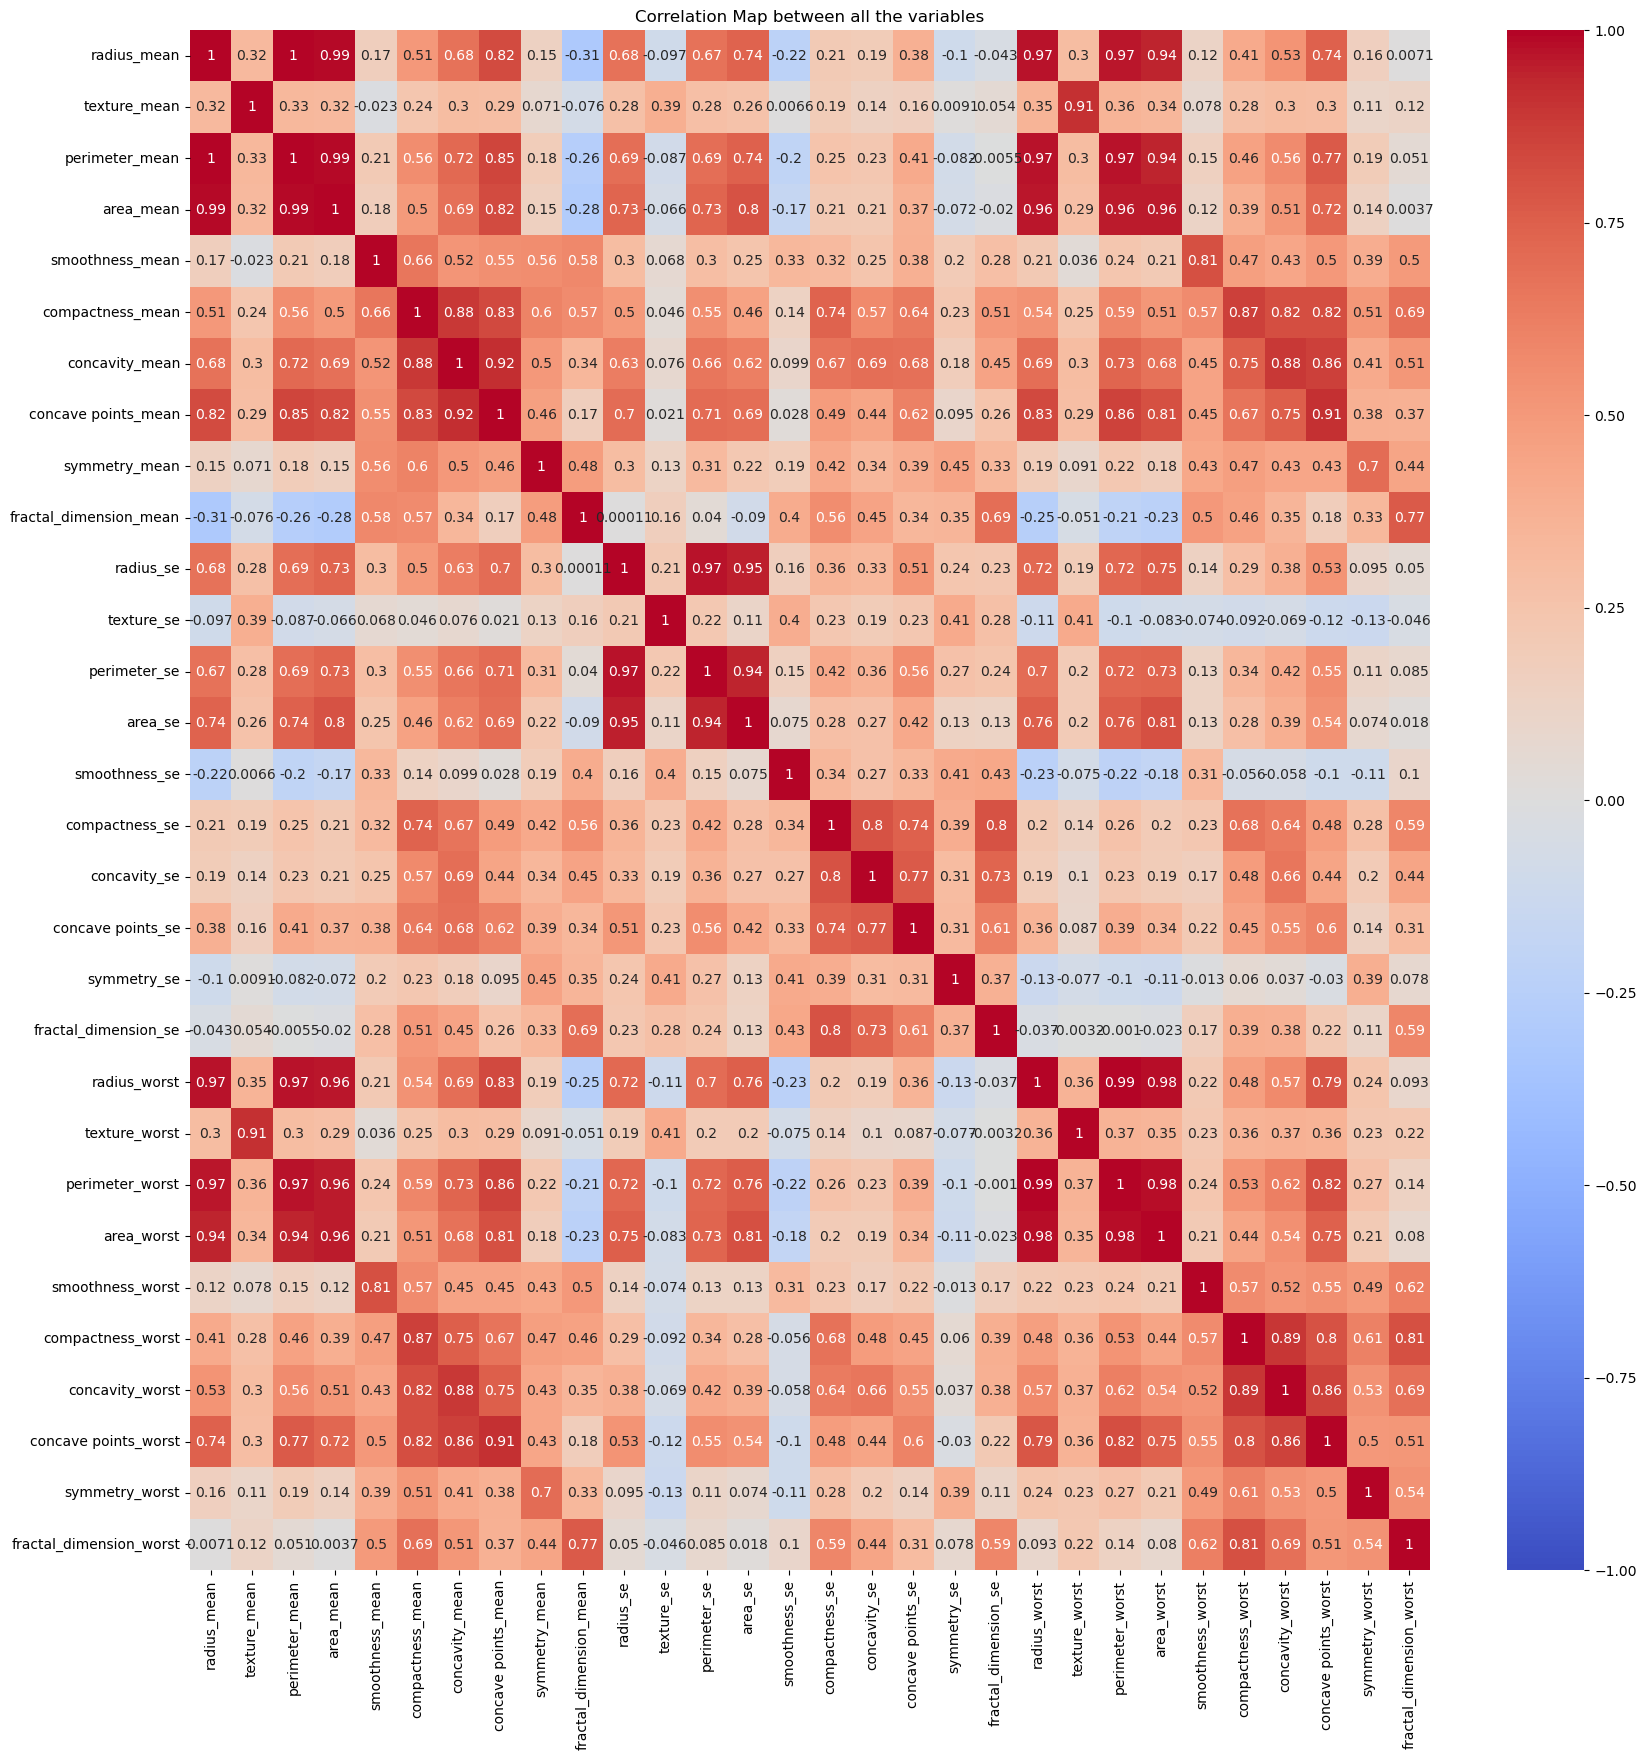

In [9]:
# Taking the resuslt column as the target column 
y = df.pop('diagnosis')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map between all the variables')
# plt.savefig('figures/Correlation Map between all the variables.png')

On peut voir que périmètre, surface et rayon sont corrélés entre eux. On peut alors enlever deux tout en gardant la pertinance de l'analyse. Dans ce cas, on a enlever périmètre et la surface.

On commence avec 30 variables
On est maintenant à 24 colonnes dans le dataset


Text(0.5, 1.0, 'Correlation Map without area and perimeter columns')

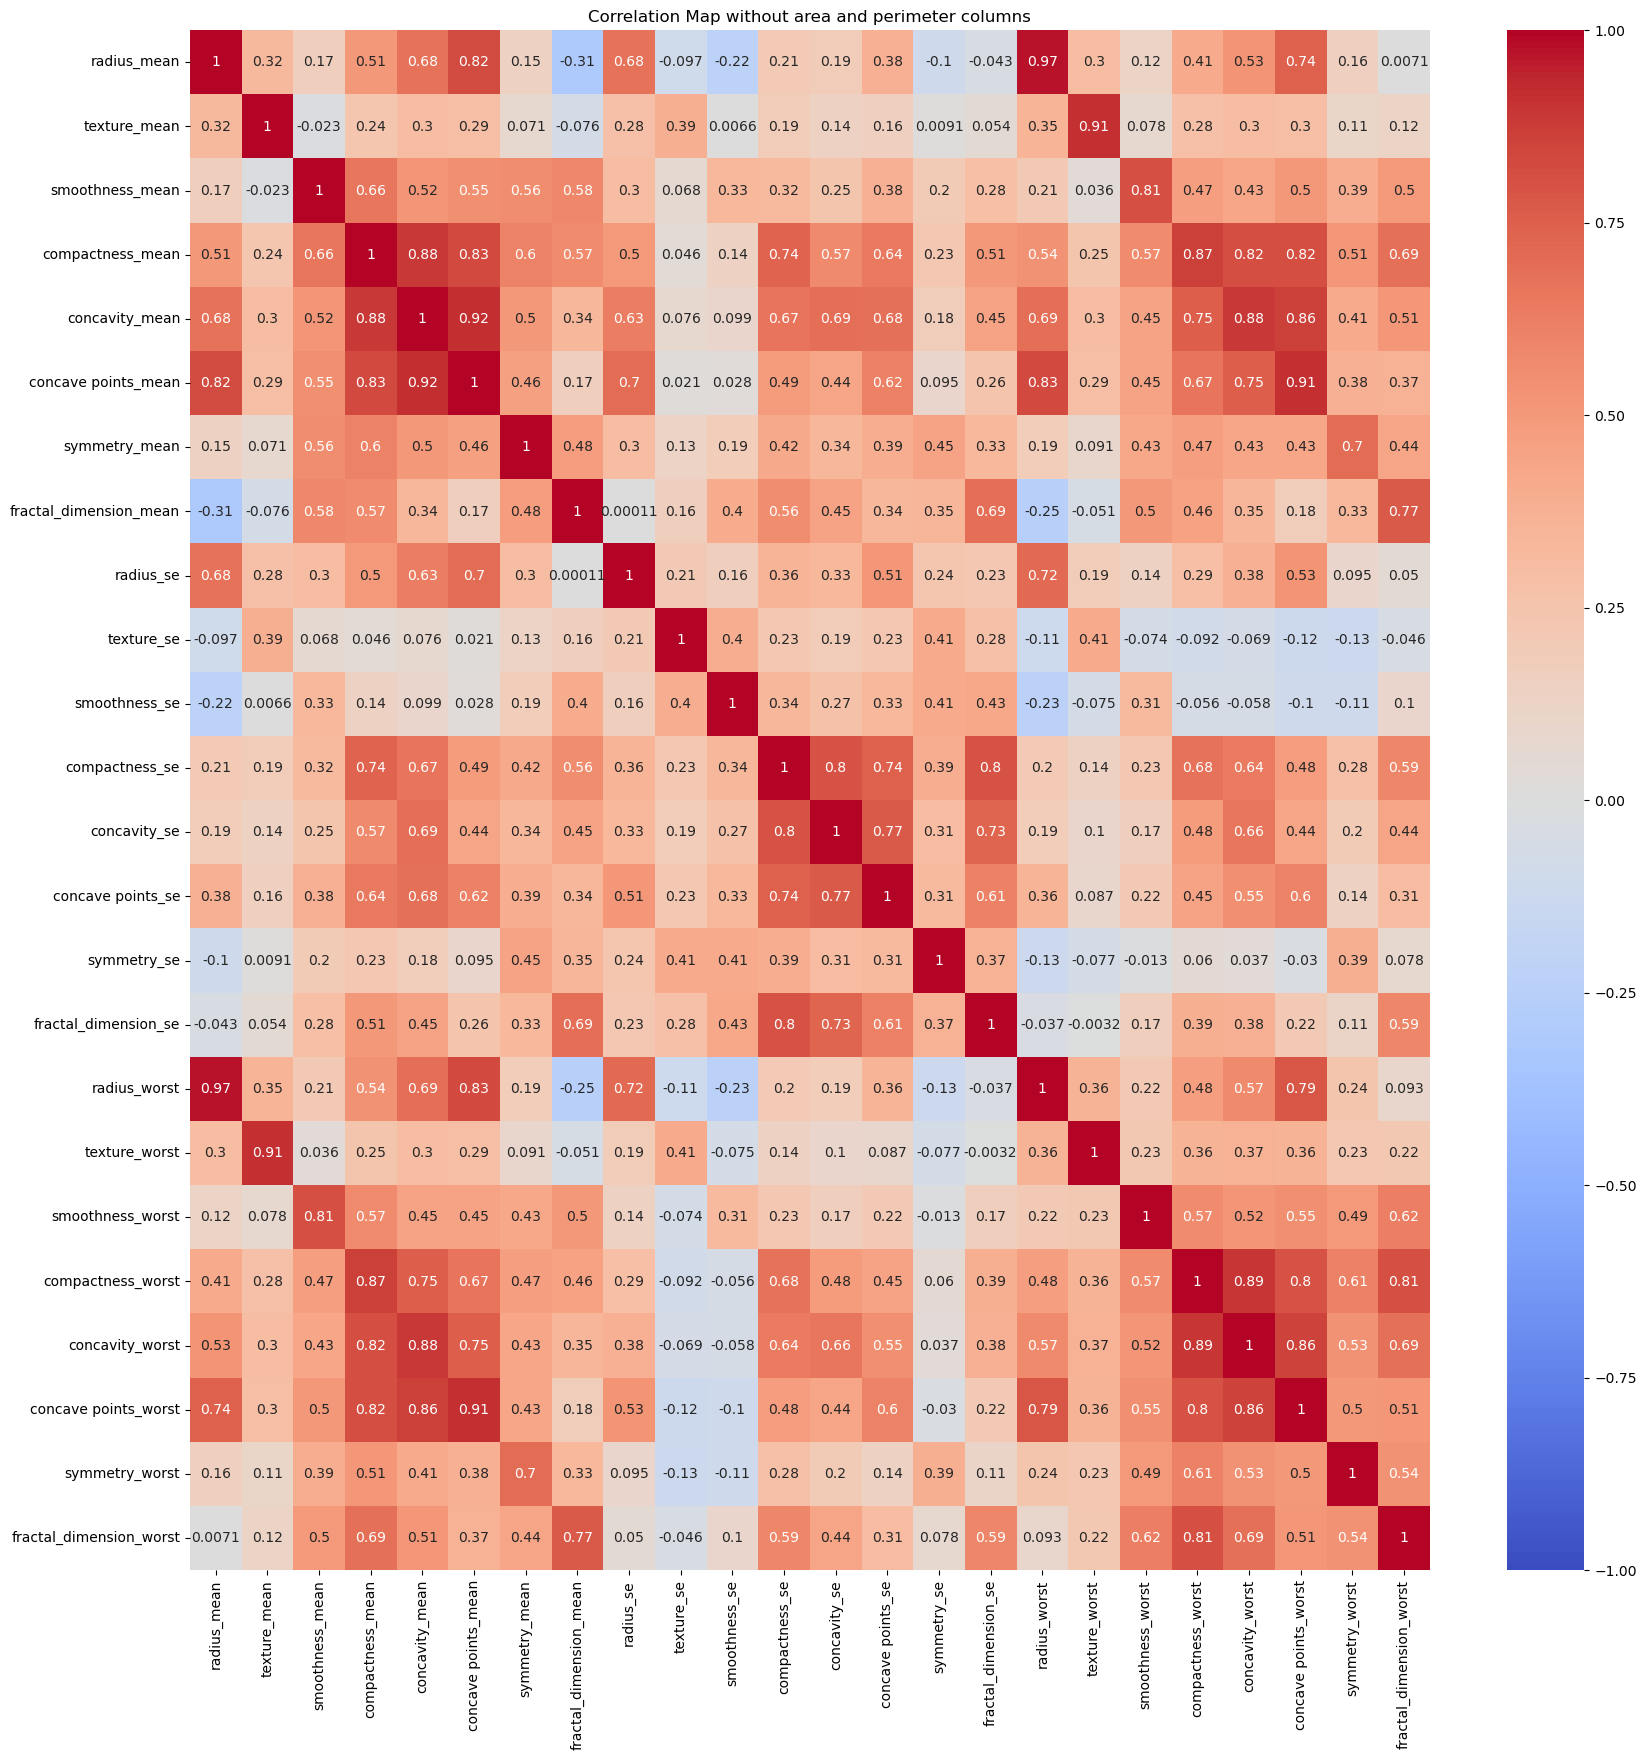

In [10]:
# Removing the perimeters and areas variables
print(f'On commence avec {len(df.columns)} variables')
df = df.drop(columns=['area_mean', 'area_se', 'area_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst'])
print(f'On est maintenant à {len(df.columns)} colonnes dans le dataset')

# The correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map without area and perimeter columns')
# plt.savefig('figures/Correlation Map without area and perimeter columns.png')

In [11]:
df.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius_se  texture_se  ...  symmetry_se  fractal_dimension_se  \
0     1.0950      0.9053  ...      0.03003              0.006193   
1     0.5435      0.7339  ...      0.01389              0.003532   
2     0.7456      0.7869  ...      0.02250              0.004571   
3     0.4956      1.1560  ...      0.05963              0.009208   
4     0.7572      0.7813  ...      0.01756              0.005115   

   radius_worst  texture_worst  smoothness_worst  compactness_worst  \
0         25.38          17.33            0.1622             0.6656   
1         24.99          23.41            0.1238             0.1866   
2         23.57          25.53            0.1444             0.4245   
3         14.91          26.50            0.2098             0.8663   
4         22.54          16.67            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 24 columns]

### Visualisation of the target

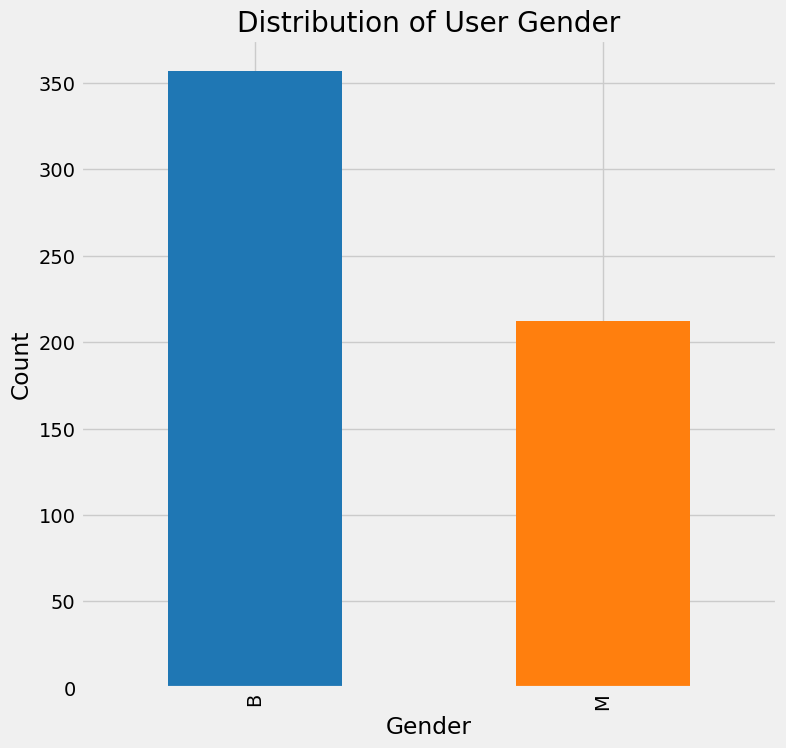

In [55]:
counts = y.value_counts()

# Define color palette
colors = ['#1f77b4', '#ff7f0e']

# Plot
plt.figure(figsize=(8, 8))
counts.plot(kind='bar', color=colors)
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('figures/Target representation.png')

# # Plot
# plt.figure(figsize=(8, 8))
# counts.plot(kind='bar')
# plt.title('Distribution of User Gender')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.savefig('figures/Target representation.png')

**Commentaire :**
La distribution des classes est déséquilibrée. Il y a plus de cas bénins que de cas malins.
Il faudrait faire une amputation de donnée


### Visualisation of the features

In [13]:
# Ensure the subfolder exists
if not os.path.exists('figures/visualizations'):
    os.makedirs('figures/visualizations')


def plotting_3_chart(df_normalized, feature):
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df_normalized.loc[:, feature], norm_hist=True, ax=ax1)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df_normalized.loc[:, feature], plot=ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df_normalized.loc[:, feature], orient='v', ax=ax3)

    # Save the figure
    fig.savefig(f'figures/visualizations/{feature}_visualization.png')
    plt.close(fig)

In [14]:
for i in df.columns[0:len(df.columns)]:
    plotting_3_chart(df,i)

C:\Users\tanjo\AppData\Local\Temp\ipykernel_104280\87419835.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_normalized.loc[:, feature], norm_hist=True, ax=ax1)
C:\Users\tanjo\AppData\Local\Temp\ipykernel_104280\87419835.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_normalized.l

In [15]:
# Each features histogram
# Plotting each feature's histogram individually
if not os.path.exists('figures/histograms full'):
    os.makedirs('figures/histograms full')

for feature in df.columns:
    plt.figure(figsize=(10, 6))
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend([f'N = {y.value_counts().to_dict()}'])
    plt.savefig(f'figures/histograms full/{feature}_histogram_full.png')
    plt.close()

## Box plot

In [47]:
# Box plot des la distributions des variables selon B ou M
# Save the box plots individually
if not os.path.exists('figures/boxplots'):
    os.makedirs('figures/boxplots')

ordonnee = y
for i, feature in enumerate(df.columns[:-1]):
    plt.figure(figsize=(13, 9))
    sns.boxplot(x=ordonnee, y=feature, data=df)
    plt.title(f'Box plot of {feature} by Diagnosis')
    plt.savefig(f'figures/boxplots/{feature}_boxplot.png')
    plt.close()


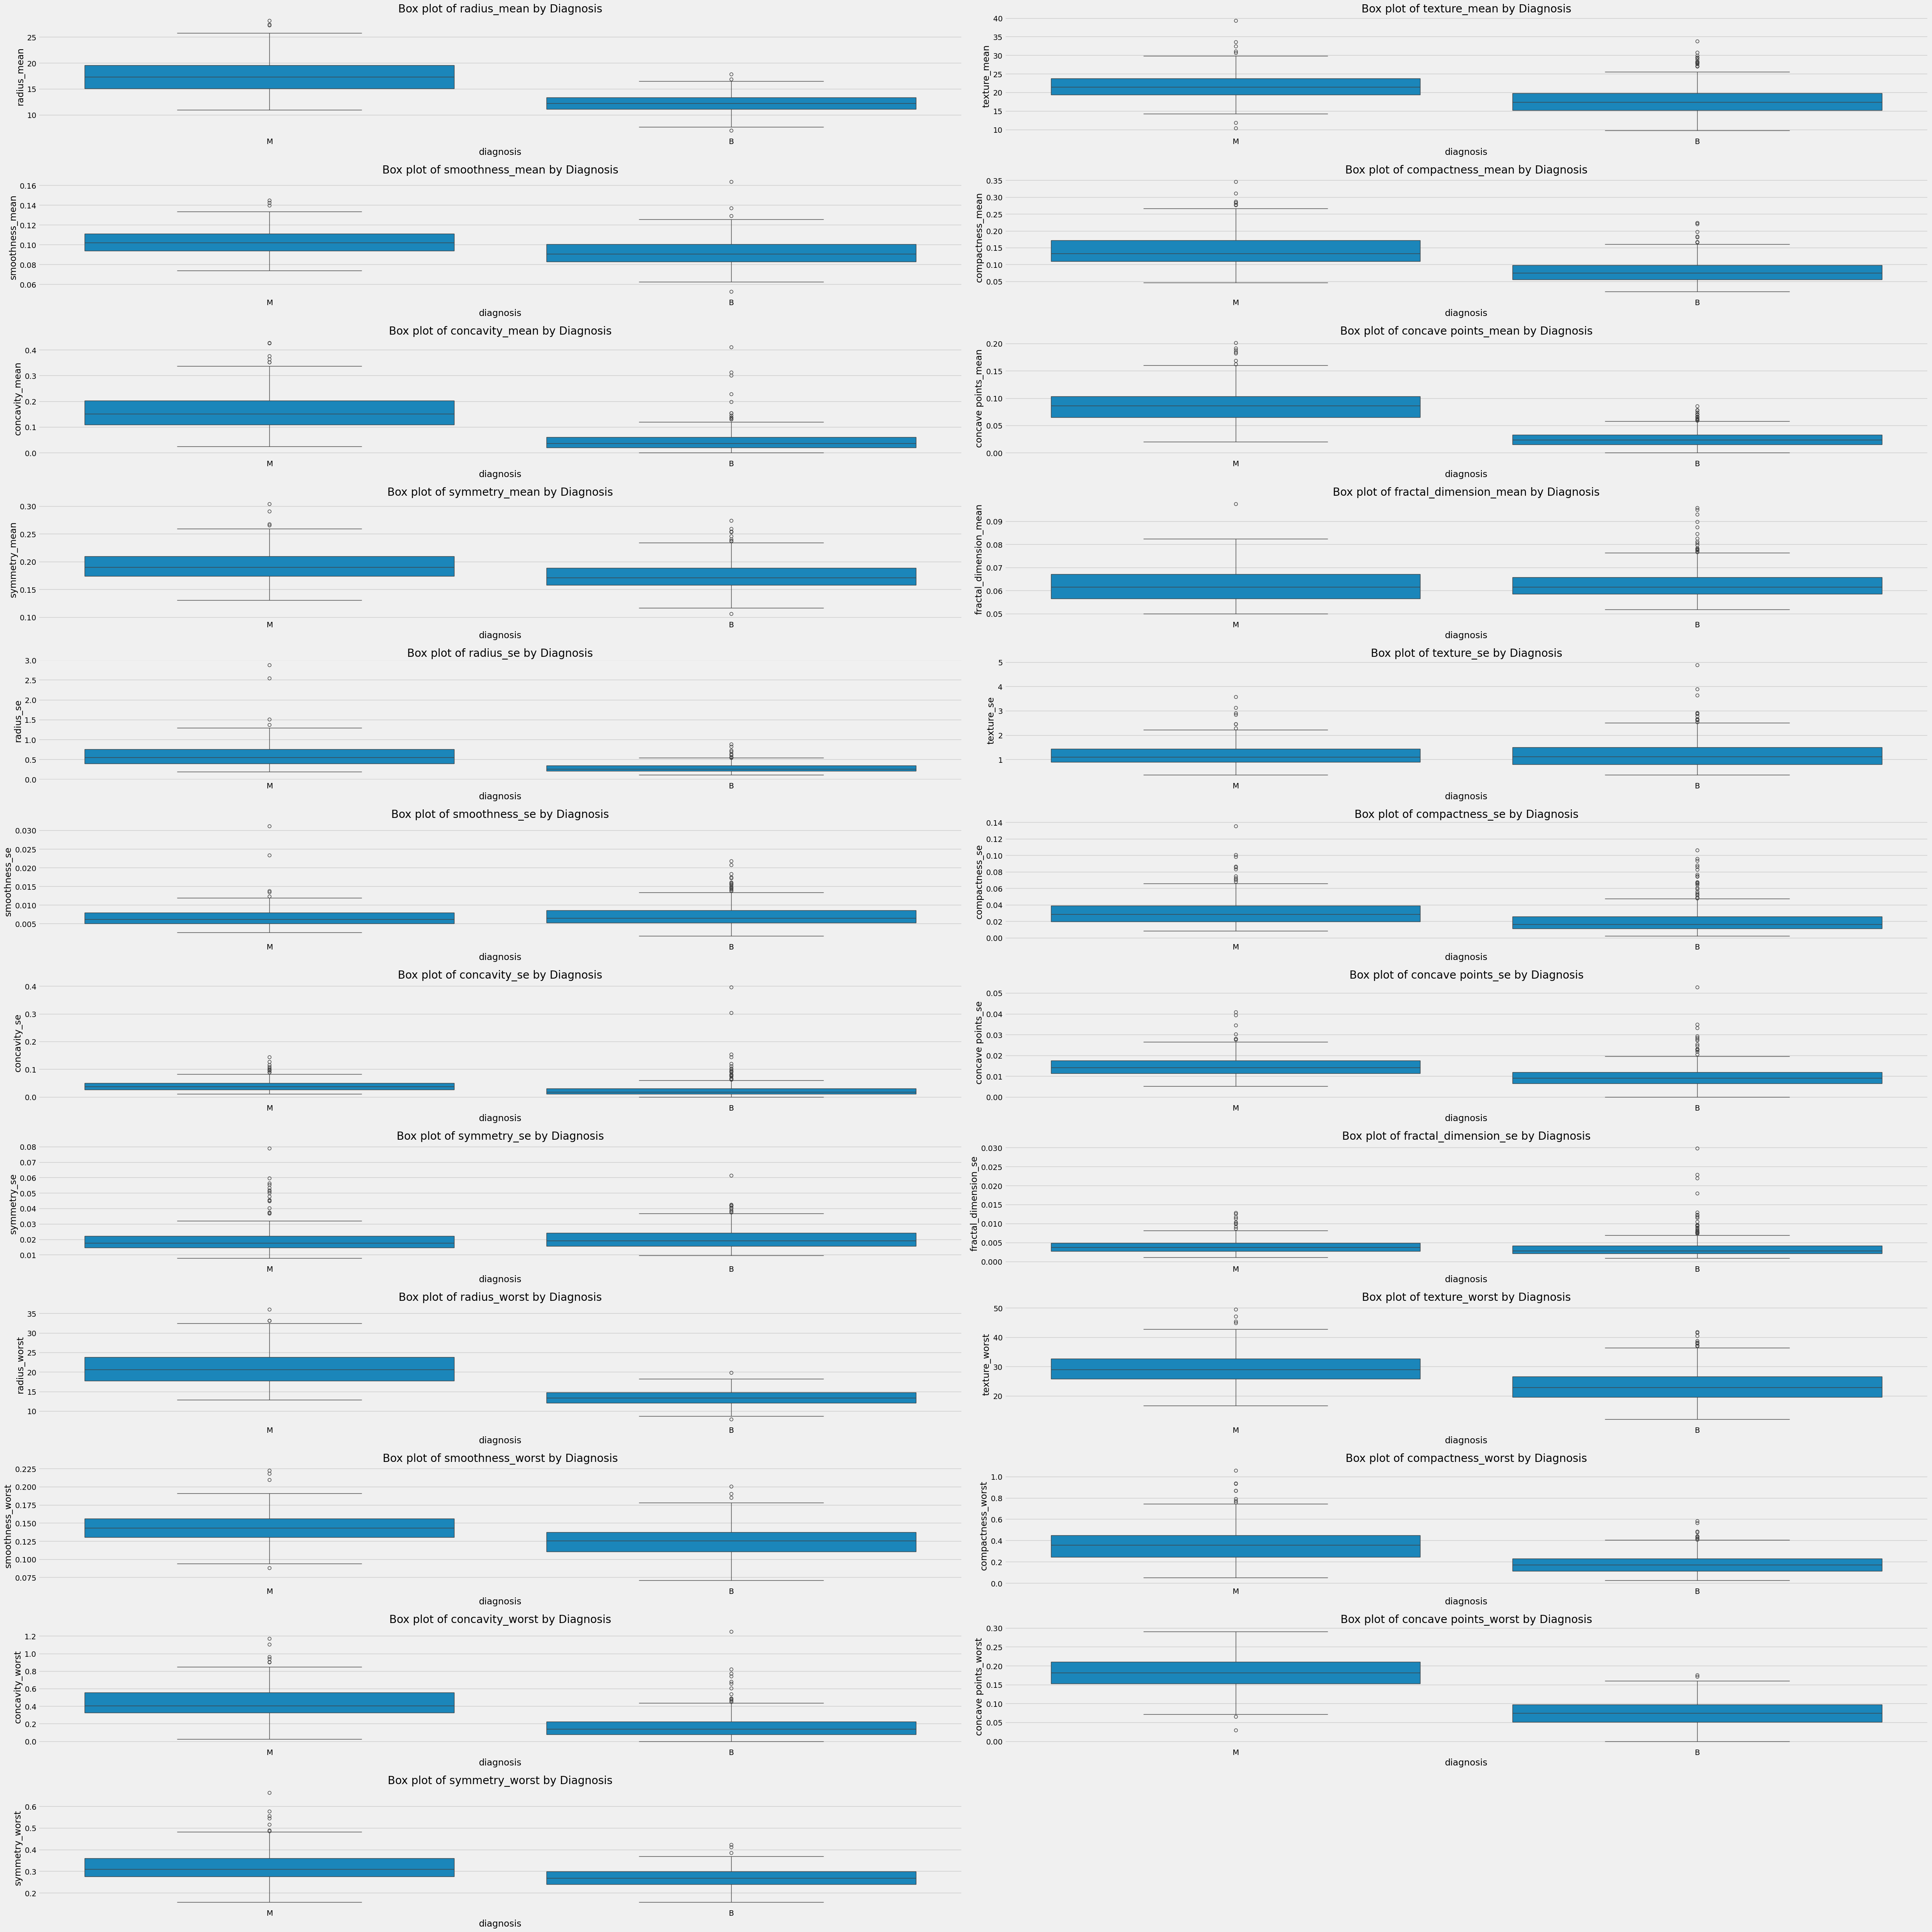

In [51]:
# Box plot des la distributions des variables selon B ou M
ordonnee = y
plt.figure(figsize=(50, 50))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(12, 2, i + 1)
    sns.boxplot(x=ordonnee, y=feature, data=df)
    plt.title(f'Box plot of {feature} by Diagnosis')
    plt.tight_layout()
plt.show()


**Global visualisation**

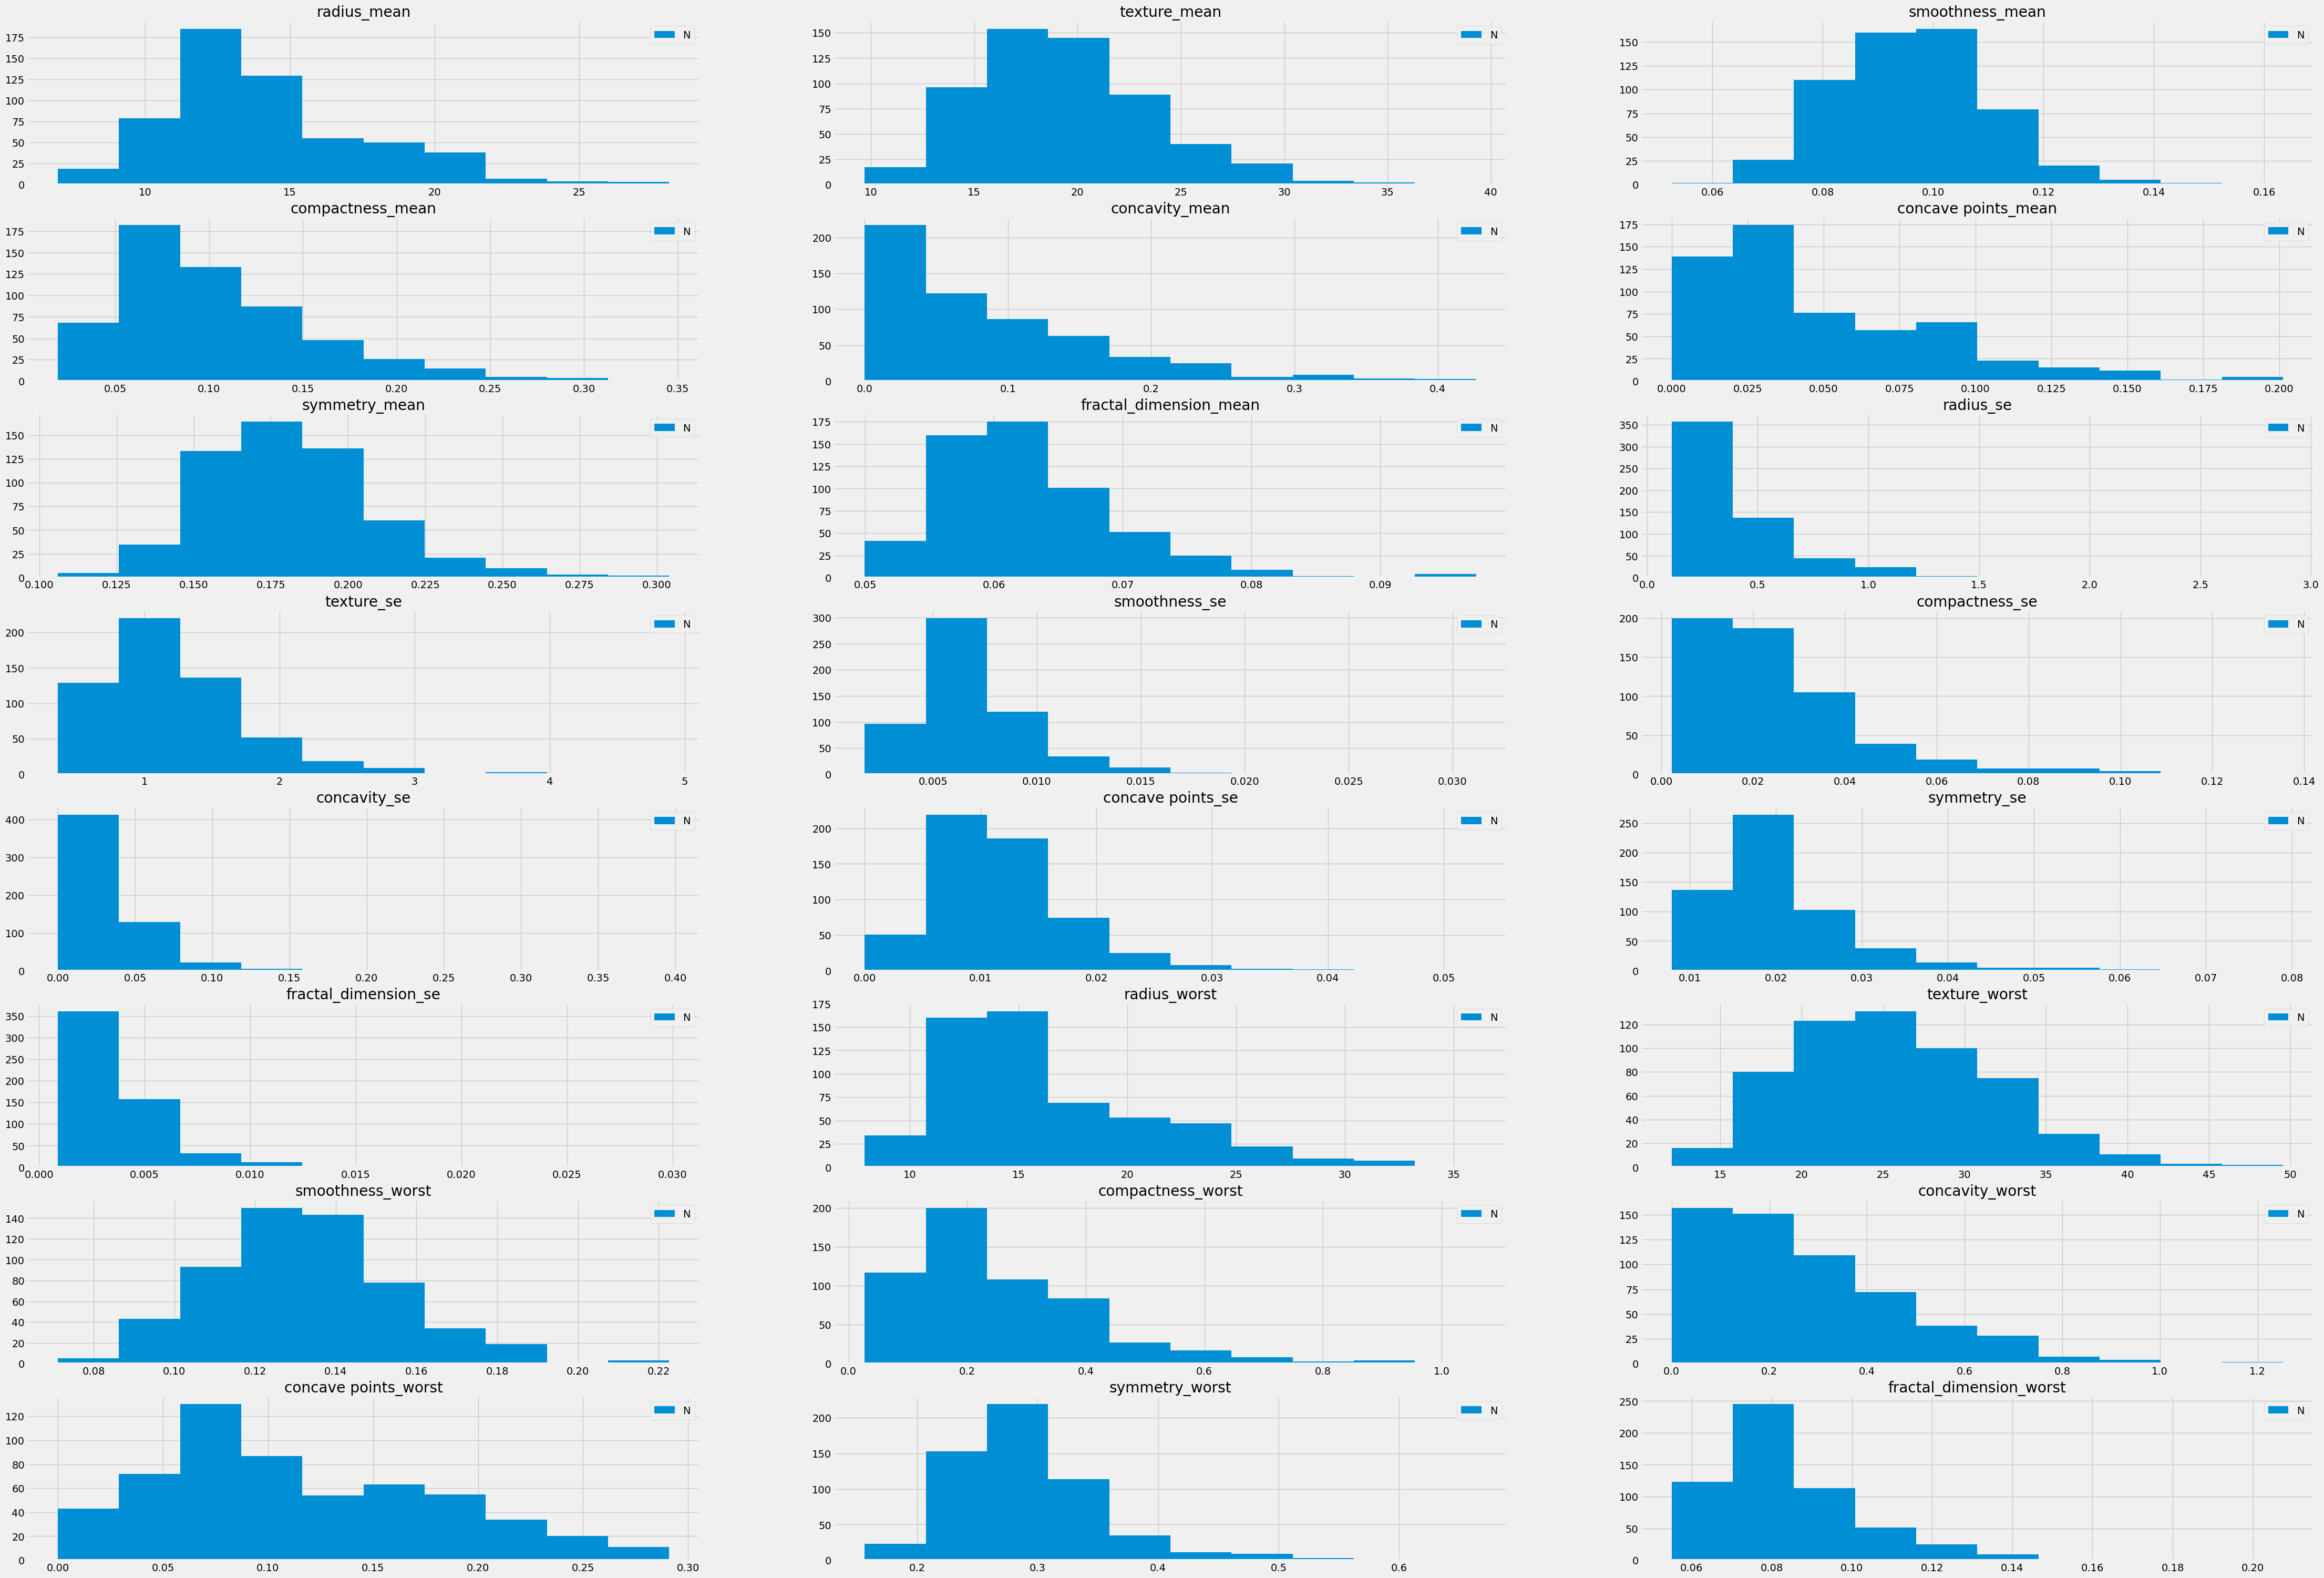

In [52]:
plt.figure(figsize=(50,50))
for i,feature in enumerate(df):
    plt.subplot(11,3,i+1)
    df[feature].hist()
    plt.legend(f'N = {y.value_counts()}')
    plt.title(feature)
    plt.savefig('figures/histograms full/full view.png')

### Adressing class imbalance

In [17]:
y.value_counts().to_frame().T

diagnosis    B    M
count      357  212

In [18]:
# Instantiate the undersampler
undersampler = RandomUnderSampler()

# Apply undersampling to your dataset
df_resampled, y_resampled = undersampler.fit_resample(df, y)

# Transforming diagnos into Boolean
y_resampled = y_resampled.map({'M': 1, 'B': 0})
y_resampled.value_counts().to_frame().T

diagnosis    0    1
count      212  212

In [19]:
df_resampled.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
519        12.75         16.70          0.11250           0.11170   
394        12.10         17.72          0.10290           0.09758   
240        13.64         15.60          0.09423           0.06630   
313        11.54         10.72          0.08597           0.05969   
93         13.45         18.30          0.10220           0.08165   

     concavity_mean  concave points_mean  symmetry_mean  \
519         0.03880             0.029950         0.2120   
394         0.04783             0.033260         0.1937   
240         0.04705             0.037310         0.1717   
313         0.01367             0.008907         0.1833   
93          0.03974             0.027800         0.1638   

     fractal_dimension_mean  radius_se  texture_se  ...  symmetry_se  \
519                 0.06623     0.3834      1.0030  ...      0.01805   
394                 0.06161     0.2841      1.6520  ...      0.02015   
240                 0.05660     0.3242      0.6612  ...      0.01898   
313                 0.06100     0.1312      0.3602  ...      0.02032   
93                  0.05710     0.2950      1.3730  ...      0.01884   

     fractal_dimension_se  radius_worst  texture_worst  smoothness_worst  \
519              0.003629         14.45          21.74            0.1475   
394              0.001798         13.56          25.80            0.1432   
240              0.001794         14.85          19.05            0.1278   
313              0.001952         12.34          12.87            0.1092   
93               0.001817         15.10          25.94            0.1339   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
519             0.1979          0.14230               0.08045          0.3071   
394             0.1773          0.16030               0.06266          0.3049   
240             0.1291          0.15330               0.09222          0.2530   
313             0.1626          0.08324               0.04715          0.3390   
93              0.1751          0.13810               0.07911          0.2678   

     fractal_dimension_worst  
519                  0.08557  
394                  0.07081  
240                  0.06510  
313                  0.07434  
93                   0.06603  

[5 rows x 24 columns]

In [20]:
# Each features histogram
# Plotting each feature's histogram individually
if not os.path.exists('figures/histograms resampled'):
    os.makedirs('figures/histograms resampled')

for feature in df_resampled.columns:
    plt.figure(figsize=(10, 6))
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend([f'N = {y.value_counts().to_dict()}'])
    plt.savefig(f'figures/histograms resampled/{feature}_histogram_resampled.png')
    plt.close()

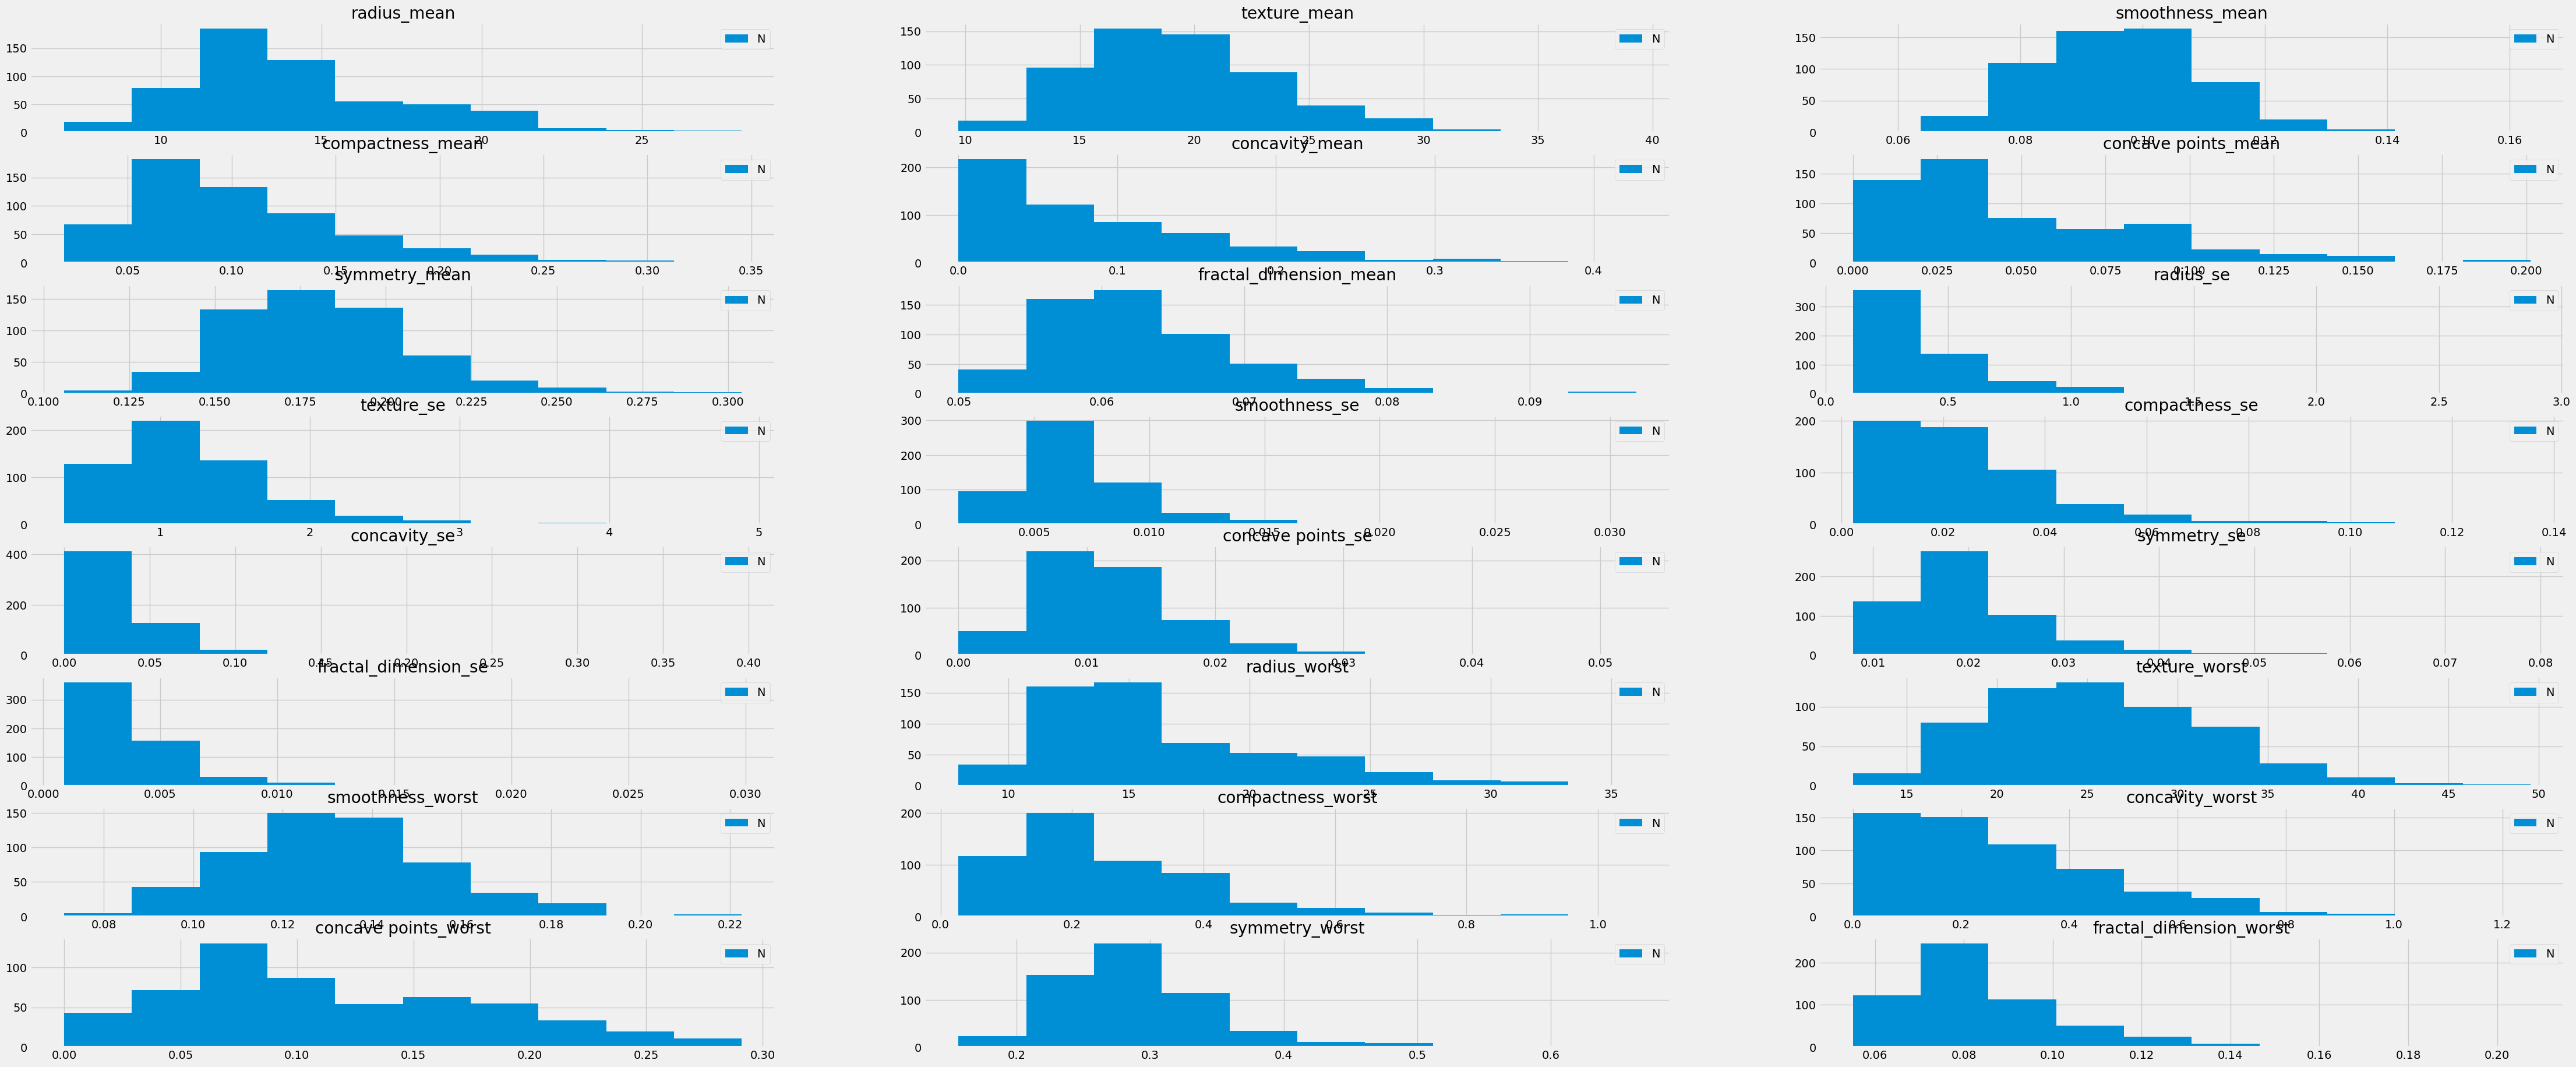

In [21]:
# For the full view
plt.figure(figsize=(50,30))
for i,feature in enumerate(df_resampled):
    plt.subplot(11,3,i+1)
    df[feature].hist()
    plt.legend(f'N = {y.value_counts()}')
    plt.title(feature)
    plt.savefig('figures/histograms resampled/full view.png')

**Comparaison du data brut et celui réduit**

In [22]:
# Ensure the subfolder exists
if not os.path.exists('figures/histograms comparison'):
    os.makedirs('figures/histograms comparison')

for feature in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Plot histogram for original dataset
    plt.hist(df[feature], bins=30, alpha=0.5, label='Original')
    
    # Plot histogram for resampled dataset
    plt.hist(df_resampled[feature], bins=30, alpha=0.5, label='Resampled')
    
    plt.title(f'Comparison of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.savefig(f'figures/histograms comparison/{feature}_comparison.png')
    plt.close()

### Analyse Bi-varié sur les data réduits

In [23]:
# Ensure the subfolder exists
if not os.path.exists('figures/comparaison cible'):
    os.makedirs('figures/comparaison cible')

# Select features to visualize
more_features_to_plot = df_resampled.columns

# Concatenate df_resampled with y_resampled
df_resampled['diagnosis'] = y_resampled

# Plot histograms for additional features
for feature in more_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_resampled, x=feature, hue='diagnosis', kde=True, palette='coolwarm', alpha=0.7)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'figures/comparaison cible/{feature}_histogram_resampled.png')
    plt.close()

In [ ]:
# Ensure the subfolder exists
if not os.path.exists('figures/comparaison cible'):
    os.makedirs('figures/comparaison cible')

# Select features to visualize
more_features_to_plot = df_resampled.columns

# Concatenate df_resampled with y_resampled
df_resampled['diagnosis'] = y_resampled

# Plot histograms for additional features
for feature in more_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_resampled, x=feature, hue='diagnosis', kde=True, palette='coolwarm', alpha=0.7)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'figures/comparaison cible/{feature}_histogram_resampled.png')
    plt.close()

## Feature selection

Il faut standardiser les données

In [24]:
# Scaling the data
df_resampled_scaled = StandardScaler().fit_transform(df_resampled)
df_resampled_scaled = pd.DataFrame(df_resampled_scaled, columns=df_resampled.columns)
df_resampled_scaled.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0    -0.562878     -0.733634         1.055327         -0.016744   
1    -0.738879     -0.497302         0.367994         -0.268968   
2    -0.321892     -0.988501        -0.252753         -0.827720   
3    -0.890510     -2.119184        -0.844146         -0.945794   
4    -0.373339     -0.362918         0.317876         -0.553525   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0       -0.760634            -0.657901       1.065221                0.454882   
1       -0.653114            -0.577294       0.388284               -0.170800   
2       -0.662402            -0.478666      -0.425520               -0.849301   
3       -1.059856            -1.170352       0.003577               -0.253412   
4       -0.749442            -0.710259      -0.717749               -0.781586   

   radius_se  texture_se  ...  fractal_dimension_se  radius_worst  \
0  -0.202789   -0.407157  ...             -0.100958     -0.552094   
1  -0.528569    0.731048  ...             -0.755730     -0.726328   
2  -0.397010   -1.006600  ...             -0.757160     -0.473786   
3  -1.030198   -1.534489  ...             -0.700659     -0.965167   
4  -0.492809    0.241743  ...             -0.748936     -0.424844   

   texture_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      -0.785254          0.542430          -0.474120        -0.759632   
1      -0.124757          0.355831          -0.597236        -0.675066   
2      -1.222875         -0.312451          -0.885304        -0.707953   
3      -2.228263         -1.119597          -0.685091        -1.037104   
4      -0.101981         -0.047742          -0.610385        -0.779364   

   concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0             -0.696908        0.157710                -0.004957       -1.0  
1             -0.958272        0.124063                -0.775146       -1.0  
2             -0.523988       -0.669703                -1.073098       -1.0  
3             -1.186138        0.645593                -0.590947       -1.0  
4             -0.716595       -0.443350                -1.024570       -1.0  

[5 rows x 25 columns]

#### Using forward selection

Optimal number of features: 4


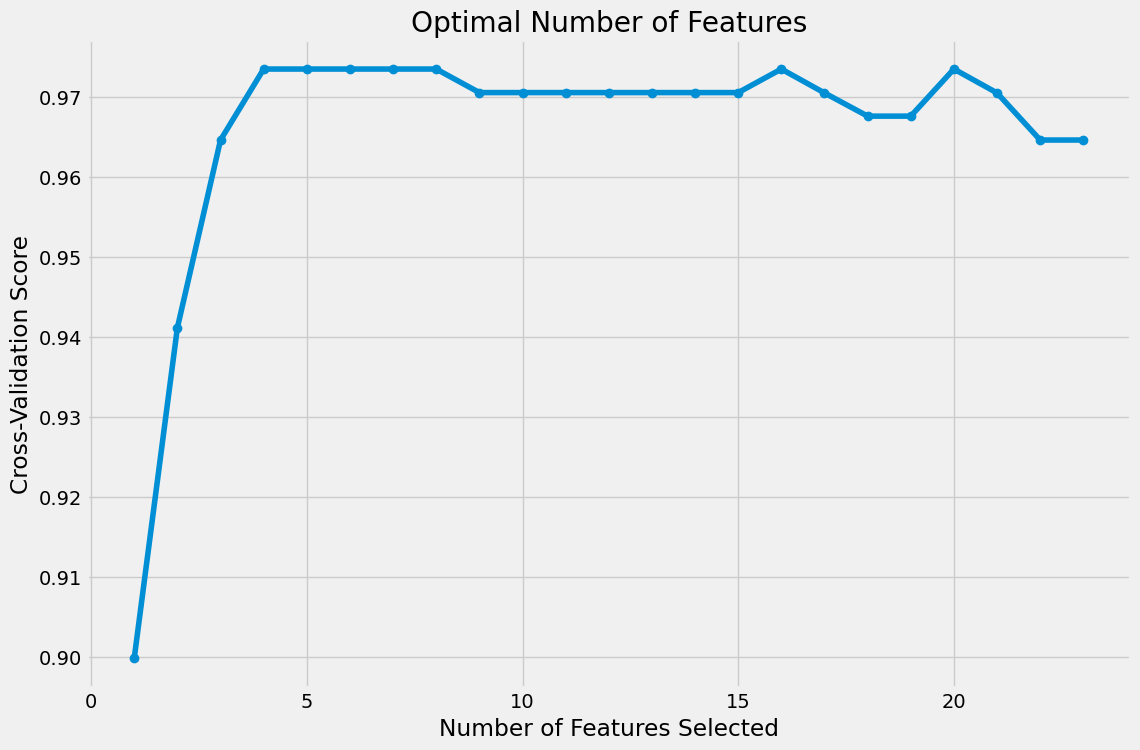

In [61]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled_scaled.drop('diagnosis', axis= 1), y_resampled, test_size=0.2, random_state=42) # The colomn diagnosis is drop from the X_train and X_test

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Track performance for each number of features
scores = []
feature_counts = list(range(1, X_train.shape[1] ))

# Loop through each possible number of features
for k in feature_counts:
    selector = SequentialFeatureSelector(clf, n_features_to_select=k, direction='forward', cv=5)
    selector.fit(X_train, y_train)
    # Evaluate model performance with cross-validation
    score = cross_val_score(clf, selector.transform(X_train), y_train, cv=5).mean()
    scores.append(score)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.title('Optimal Number of Features')
plt.savefig('figures/features selection.png')

# Find the optimal number of features
optimal_num_features = feature_counts[scores.index(max(scores))]
print("Optimal number of features:", optimal_num_features)

In [26]:
# Selecting the optimal features
selector = SequentialFeatureSelector(clf, n_features_to_select=optimal_num_features, direction='forward', cv=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

print(f'On a selectionné {optimal_num_features} features')
print("Selected features:", selected_features)

On a selectionné 4 features
Selected features: Index(['concave points_mean', 'radius_worst', 'texture_worst',
       'symmetry_worst'],
      dtype='object')


In [27]:
# Save the columns related to the selected_features and the target y in a csv file
df_selected = df_resampled[selected_features]
df_selected['diagnosis'] = y_resampled.values
df_selected.to_csv('forward_selected_features.csv', index=False)


C:\Users\tanjo\AppData\Local\Temp\ipykernel_104280\501591356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['diagnosis'] = y_resampled.values


### Backward selection

Optimal number of features: 9


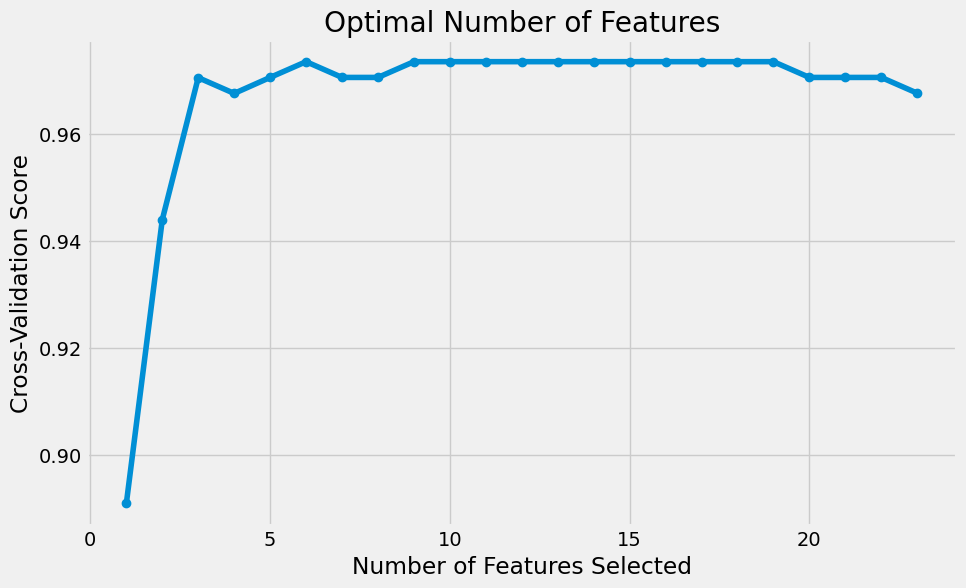

In [ ]:
# Instantiate the logistic regression model
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled_scaled.drop('diagnosis', axis= 1), y_resampled, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Track performance for each number of features
scores = []
feature_counts = list(range(1, X_train.shape[1] ))

# Loop through each possible number of features
for k in feature_counts:
    selector = SequentialFeatureSelector(clf, n_features_to_select=k, direction='backward', cv=5)
    selector.fit(X_train, y_train)
    # Evaluate model performance with cross-validation
    score = cross_val_score(clf, selector.transform(X_train), y_train, cv=5).mean()
    scores.append(score)

# Plot the results
plt.figure(figsize=(15, 10))
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.title('Optimal Number of Features')
plt.savefig('figures/backward features selection.png')

# Find the optimal number of features
optimal_num_features = feature_counts[scores.index(max(scores))]
print("Optimal number of features:", optimal_num_features)

In [29]:
# Saving the selected features
selector = SequentialFeatureSelector(clf, n_features_to_select=optimal_num_features, direction='backward', cv=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

print(f'On a selectionné {optimal_num_features} features')
print("Selected features:", selected_features)

On a selectionné 9 features
Selected features: Index(['texture_mean', 'concavity_mean', 'radius_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'smoothness_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [30]:
# Save the columns related to the selected_features and the target y in a csv file
df_selected = df_resampled[selected_features]
df_selected['diagnosis'] = y_resampled.values
df_selected.to_csv('backward_selected_features.csv', index=False)

C:\Users\tanjo\AppData\Local\Temp\ipykernel_104280\3239240536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['diagnosis'] = y_resampled.values


### ILLUSTRATION OF THE DATA

In [31]:
df_back = pd.read_csv('backward_selected_features.csv')
df_forw = pd.read_csv('forward_selected_features.csv')

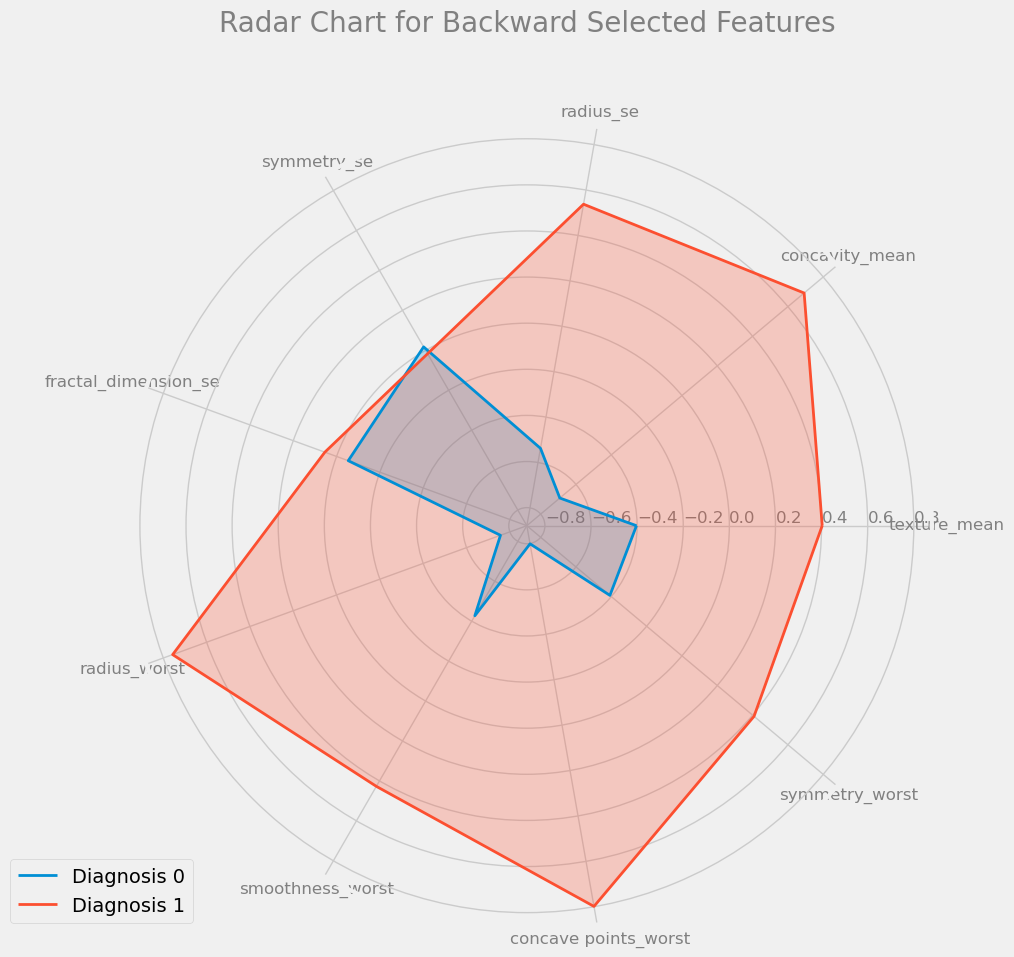

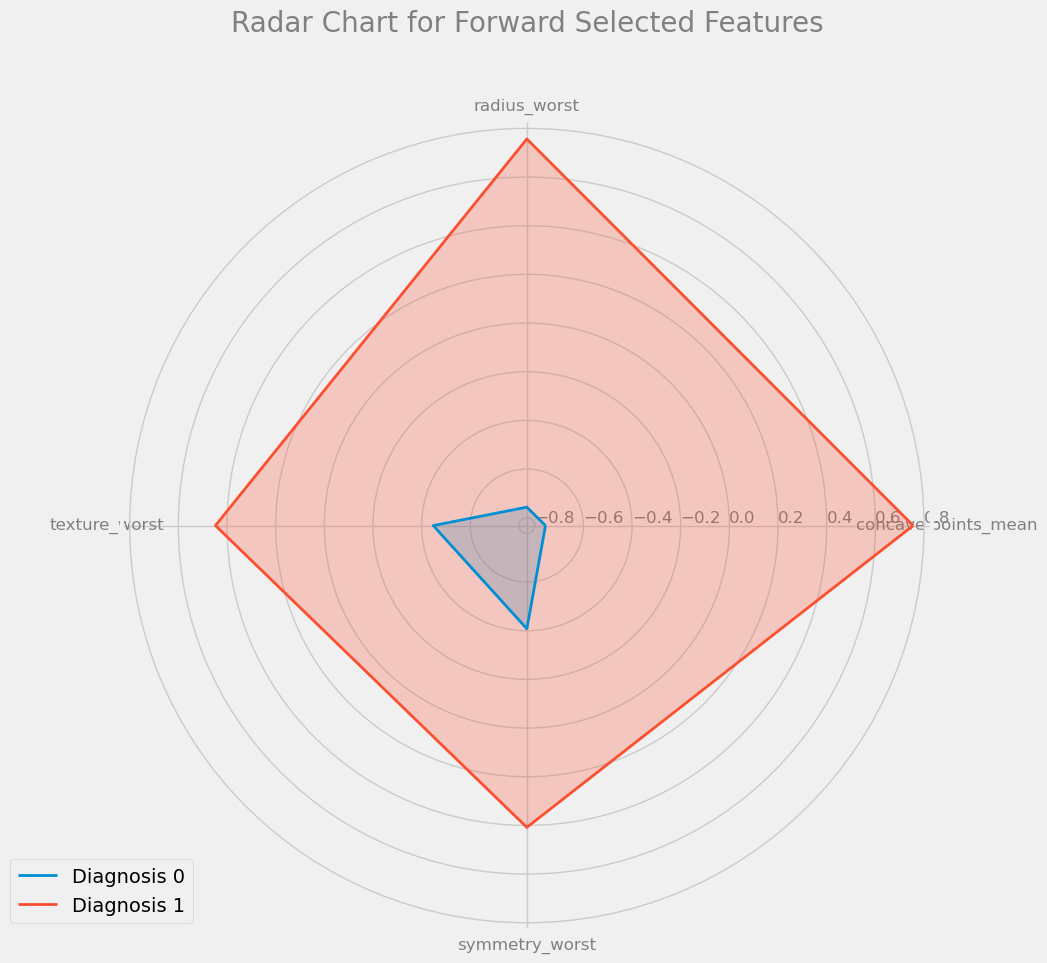

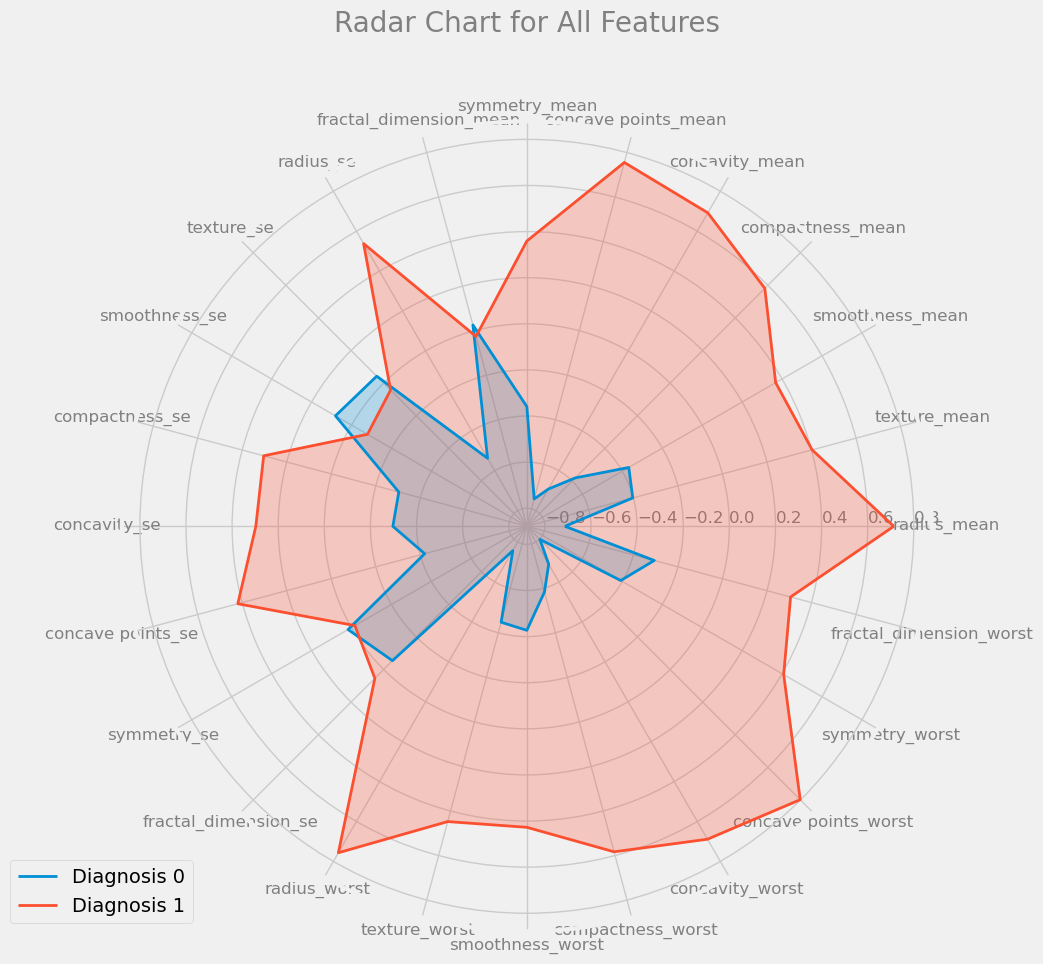

In [58]:
# Function to plot radar chart
df_back_scaled = StandardScaler().fit_transform(df_back.drop('diagnosis', axis=1))
df_back_scaled = pd.DataFrame(df_back_scaled, columns=df_back.columns[:-1])
df_back_scaled['diagnosis'] = df_back['diagnosis'].values

df_forw_scaled = StandardScaler().fit_transform(df_forw.drop('diagnosis', axis=1))
df_forw_scaled = pd.DataFrame(df_forw_scaled, columns=df_forw.columns[:-1])
df_forw_scaled['diagnosis'] = df_forw['diagnosis'].values
def plot_radar_chart(df, title):
    categories = list(df.columns[:-1])
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Loop through each diagnosis category
    for diagnosis in df['diagnosis'].unique():
        values = df[df['diagnosis'] == diagnosis].mean().drop('diagnosis').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Diagnosis {diagnosis}')
        ax.fill(angles, values, alpha=0.25)

    # Add labels
    plt.xticks(angles[:-1], categories, color='grey', size=12)
    ax.set_rlabel_position(0)
    plt.yticks(color='grey', size=12)
    plt.title(title, size=20, color='grey', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # plt.show()

# Plot radar chart for backward selected features
plot_radar_chart(df_back_scaled, 'Radar Chart for Backward Selected Features')
plt.savefig('figures/backward radar chart.png')

# Plot radar chart for forward selected features
plot_radar_chart(df_forw_scaled, 'Radar Chart for Forward Selected Features')
plt.savefig('figures/forward radar chart.png')  

X = df_resampled_scaled.drop('diagnosis', axis=1).assign(diagnosis=y_resampled.values)
plot_radar_chart(X, 'Radar Chart for All Features')

# Model